#Интервальные числа

a' + b' = [a1, a2] + [b1, b2] = [a1 + b1, a2 + b2];<br>
a' - b' = [a1, a2] - [b1, b2] = [a1 - b1, a2 - b2];<br>
k * a' = k * [a1, a2] = {[k * a1, k * a2], k > 0; [k * a2, k * a1], k < 0};<br>


In [2]:
a = [2, 4]
b = [3, 5]
k = 3

def int_add(num1, num2):
    answer = []
    for i in range(2):
        answer.append(num1[i] + num2[i])
    return answer


def int_sub(num1, num2):
    answer = []
    for i in range(2):
        answer.append(num1[i] - num2[i])
    return answer


def int_mul(num1, num2):
    temp = []
    for i in num1:
        for j in num2:
            temp.append(i * j)
    return [min(temp), max(temp)]


def int_div(num1, num2):
    num2 = [1 / i for i in num2][::-1]
    return int_mul(num1, num2)


def int_const(num1, const):
    answer = [] 
    if const > 0:
        for i in num1:
            answer.append(const * i)
    else:
        for i in num1[::-1]:
            answer.append(const * i)
    return answer


print(int_add(a, b))
print(int_sub(a, b))
print(int_mul(a, b))
print(int_div(a, b))
print(int_const(a, 3))
print(int_const(a, -3))

[5, 9]
[-1, -1]
[6, 20]
[0.4, 1.3333333333333333]
[6, 12]
[-12, -6]


In [3]:
class Interval:
    def __init__(self, interval):
        self.interval = interval  

    
    def __add__(self, other):
        answer = []
        for i in range(2):
            answer.append(self.interval[i] + other.interval[i])
        return Interval(answer)
    

    def __sub__(self, other):
        answer = []
        for i in range(2):
            answer.append(self.interval[i] - other.interval[i])
        return Interval(answer)
    

    def __mul__(self, other):
        answer = []
        if type(other.interval) == list:
            temp = []
            for i in self.interval:
                for j in other.interval:
                    temp.append(i * j)
            return Interval([min(temp), max(temp)])
        else:
            answer = [] 
            if other.interval > 0:
                for i in self.interval:
                    answer.append(other.interval * i)
            else:
                for i in self.interval[::-1]:
                    answer.append(other.interval * i)
            return Interval(answer)
    

    def __truediv__(self, other):
        other.interval = [1 / i for i in other.interval][::-1]
        return Interval(self.interval) * Interval(other.interval)


    def diff_int(self, other, n):
        right = (2 ** (n - 1) * (other.interval[1] - other.interval[0])) / \
            ((self.interval[1] - self.interval[0]) ** n)
        left = -right
        return [left, right]


In [156]:
a = Interval([2, 4])
b = Interval([3, 5])
k = Interval(3)
print((a + b).interval)
print((a - b).interval)
print((a * b).interval)
print((a / b).interval)
print((a * k).interval)
k = Interval(-3)
print((a * k).interval)
x = [2, 4]
y = [2 * x[0] - 5, 2 * x[1] ** 2]
x = Interval(x)
y = Interval(y)
n = 4 #Порядок производной
print(Interval.diff_int(x, y, n))
x = [3, 6]
y = [2 * x[0] - 5, 2 * x[1] ** 2]
x = Interval(x)
y = Interval(y)
n = 3 #Порядок производной
print(Interval.diff_int(x, y, n))
x = [-10, 5]
y = [2 * x[0] - 5, 2 * x[1] ** 2]
x = Interval(x)
y = Interval(y)
n = 9 #Порядок производной
print(Interval.diff_int(x, y, n))

[5, 9]
[-1, -1]
[6, 20]
[0.4, 1.3333333333333333]
[6, 12]
[-12, -6]
[-16.5, 16.5]
[-10.518518518518519, 10.518518518518519]
[-4.994360615759793e-07, 4.994360615759793e-07]


e = a = [a1, a2]
xi = b = [b1, b2]
m = const

In [5]:
a = [2, 4]
b = [3, 5]
k = 3

def a1(a, b, k):
    a_sqr = int_mul(a, a)
    b_sqr = int_mul(b, b)
    first = int_const(a_sqr, k**2)
    second = int_const(int_mul(a, b), (2 * k * (k - 1)))
    third = int_const(b_sqr, k**2)
    answer = int_const(int_add(int_sub(first, second), third), 0.5)
    return answer

print(a1(a, b, k))

def a2(a, b, k):
    answer = int_const(int_sub(a, b), k)
    return answer

print(a2(a, b, k))

[22.5, 64.5]
[-3, -3]


###Интевальная производная

In [6]:
x = [2, 4]
f = [3 + 5 * x[0], 5 + 7 * x[1]]
n = 4 #Порядок производной
def diff_int(x, y, n):
    right = (2 ** (n - 1) * (y[1] - y[0])) / ((x[1] - x[0]) ** n)
    left = -right
    return [left, right]

print(diff_int(x, f, n))
print(diff_int([3, 6], [2, 8], 3))
print(diff_int([-10, 5], [-6, -1], 9))

[-10.0, 10.0]
[-0.8888888888888888, 0.8888888888888888]
[-3.329573743839862e-08, 3.329573743839862e-08]


#Нечеткие числа

###Функция определения

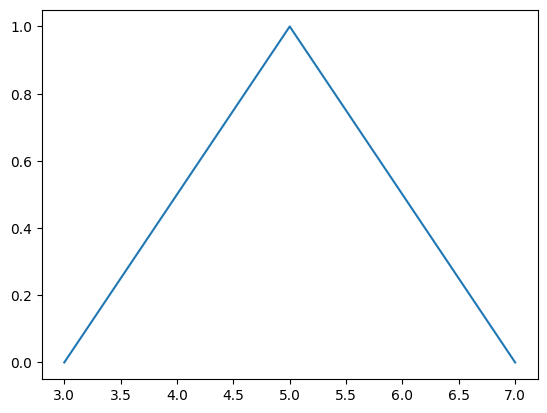

In [7]:
import numpy as np
from matplotlib import pyplot as plt

a, b, c = 3, 5, 7
def func(x, a, b, c):
    if x <= a:
        return 0
    elif a <= x <= b:
        return (x - a) / (b - a)
    elif b <= x <= c:
        return (c - x) / (c - b)
    elif c <= x:
        return 0


ans_arr = []
for i in np.arange(a, c + 1):
    ans_arr.append(func(i, a, b, c))

x = [i for i in np.arange(a, c + 1)]
y = np.array(ans_arr)
plt.plot(x, ans_arr)


###Операции с нечеткими числами

In [8]:
def ver(left, number, right):
    ver = []
    for i in np.arange(left, right+1):
        ver.append(round(func(i, left, number, right), 3))
    x = [round(i, 3) for i in np.arange(left, right + 1)]
    return ver, x


def sort_by_value(x, y):
    N = len(x)
    for i in range(N - 1):
        for j in range(N - i - 1):
            if x[j] > x[j + 1]:
                x[j], x[j + 1] = x[j + 1], x[j]
                y[j], y[j + 1] = y[j + 1], y[j]
    return x, y

def get_max(dct):
    x, y = [], []
    for i in dct:
            x.append(i)
            y.append(max(dct.get(i)))
    return sort_by_value(x, y)


def fuzzy_add(ver_a, x_a, ver_b, x_b):
    dct = {}
    diap_a = len(x_a)
    diap_b = len(x_b)
    for i in range(diap_a):
        for j in range(diap_b):
            operation = x_a[i] + x_b[j]
            if operation not in dct:
                dct.update({operation: []})
            mn = min(ver_a[i], ver_b[j])
            dct[operation].append(mn)
    return get_max(dct)


def fuzzy_sub(ver_a, x_a, ver_b, x_b):
    dct = {}
    diap_a = len(x_a)
    diap_b = len(x_b)
    for i in range(diap_a):
        for j in range(diap_b):
            operation = x_a[i] - x_b[j]
            if operation not in dct:
                dct.update({operation: []})
            mn = min(ver_a[i], ver_b[j])
            dct[operation].append(mn)
    return get_max(dct)


def fuzzy_mul(ver_a, x_a, ver_b, x_b):
    dct = {}
    diap_a = len(x_a)
    diap_b = len(x_b)
    for i in range(diap_a):
        for j in range(diap_b):
            operation = x_a[i] * x_b[j]
            if operation not in dct:
                dct.update({operation: []})
            mn = min(ver_a[i], ver_b[j])
            dct[operation].append(mn)
    return get_max(dct)


def fuzzy_div(ver_a, x_a, ver_b, x_b):
    dct = {}
    diap_a = len(x_a)
    diap_b = len(x_b)
    for i in range(diap_a):
        for j in range(diap_b):
            operation = x_a[i] / x_b[j]
            if operation not in dct:
                dct.update({operation: []})
            mn = min(ver_a[i], ver_b[j])
            dct[operation].append(mn)
    return get_max(dct)


def fuzzy_max(ver_a, x_a, ver_b, x_b):
    dct = {}
    diap_a = len(x_a)
    diap_b = len(x_b)
    for i in range(diap_a):
        for j in range(diap_b):
            operation = max(x_a[i], x_b[j])
            if operation not in dct:
                dct.update({operation: []})
            mn = min(ver_a[i], ver_b[j])
            dct[operation].append(mn)
    return get_max(dct)


def fuzzy_min(ver_a, x_a, ver_b, x_b):
    dct = {}
    diap_a = len(x_a)
    diap_b = len(x_b)
    for i in range(diap_a):
        for j in range(diap_b):
            operation = min(x_a[i], x_b[j])
            if operation not in dct:
                dct.update({operation: []})
            mn = min(ver_a[i], ver_b[j])
            dct[operation].append(mn)
    return get_max(dct)


"""
left_a, a, right_a = 1, 4, 9
left_b, b, right_b = 3, 7, 11
ver_a, x_a = ver(left_a, a, right_a)
ver_b, x_b = ver(left_b, b, right_b)
"""
ver_a = np.array([0.1, 0.8, 0.4])
x_a = np.array([5, 6, 7])
ver_b = np.array([0.2, 0.9, 0.3])
x_b = np.array([4, 5, 6])


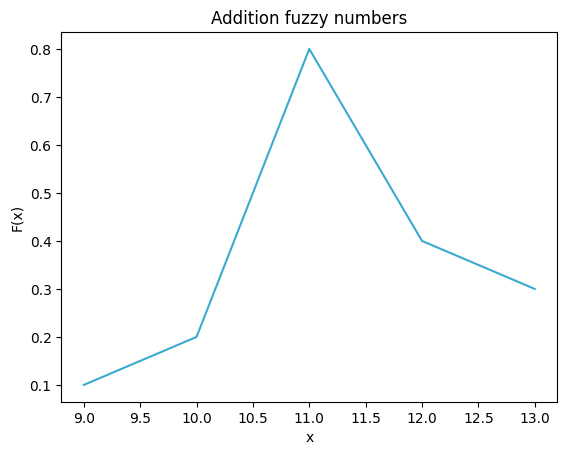

In [9]:
x, y = fuzzy_add(ver_a, x_a, ver_b, x_b)

plt.title('Addition fuzzy numbers', fontsize=12)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot(x, y, color='#3AAACF')
plt.show()

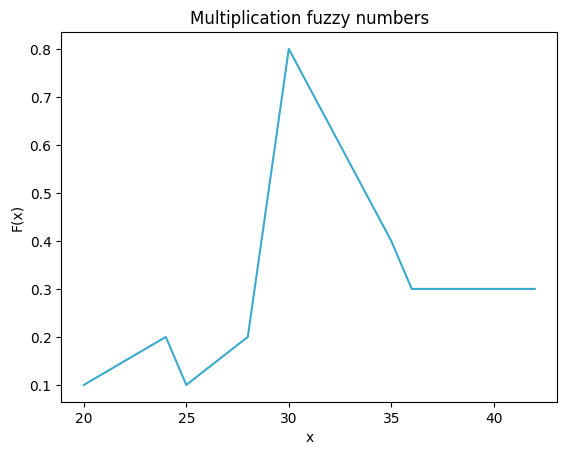

In [10]:
x, y = fuzzy_mul(ver_a, x_a, ver_b, x_b)

plt.title('Multiplication fuzzy numbers', fontsize=12)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot(x, y, color='#3AAACF')
plt.show()

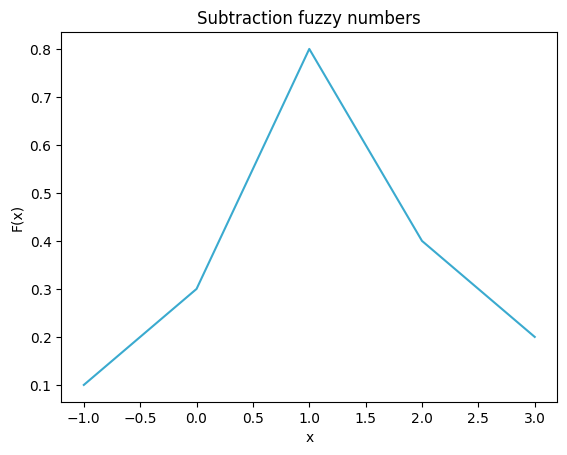

In [11]:
x, y = fuzzy_sub(ver_a, x_a, ver_b, x_b)
plt.title('Subtraction fuzzy numbers', fontsize=12)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot(x, y, color='#3AAACF')
plt.show()

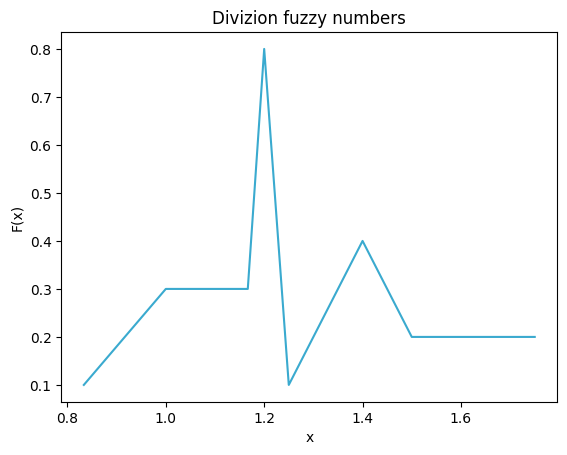

In [12]:
x, y = fuzzy_div(ver_a, x_a, ver_b, x_b)

plt.title('Divizion fuzzy numbers', fontsize=12)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot(x, y, color='#3AAACF')
plt.show()

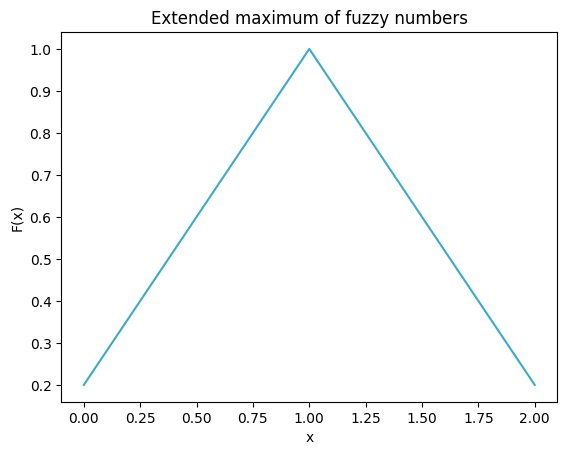

In [13]:
ver_a = np.array([0.2, 1, 0.2])
x_a = np.array([0, 1, 2])
ver_b = np.array([0.1, 1, 0.1])
x_b = np.array([-1, 0, 1])
x, y = fuzzy_max(ver_a, x_a, ver_b, x_b)

plt.title('Extended maximum of fuzzy numbers', fontsize=12)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot(x, y, color='#3AAACF')
plt.show()

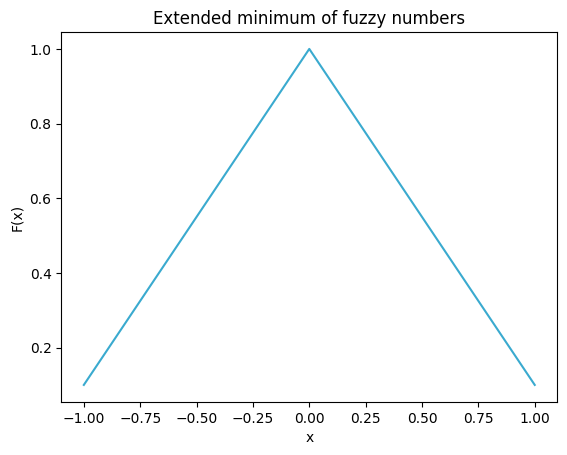

In [14]:
ver_a = np.array([0.2, 1, 0.2])
x_a = np.array([0, 1, 2])
ver_b = np.array([0.1, 1, 0.1])
x_b = np.array([-1, 0, 1])
x, y = fuzzy_min(ver_a, x_a, ver_b, x_b)

plt.title('Extended minimum of fuzzy numbers', fontsize=12)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.plot(x, y, color='#3AAACF')
plt.show()

##Производные в нечетких числах

###Нечеткие дифференциальные модели

In [15]:
def f(x, y, z):
    return x + y * y + z


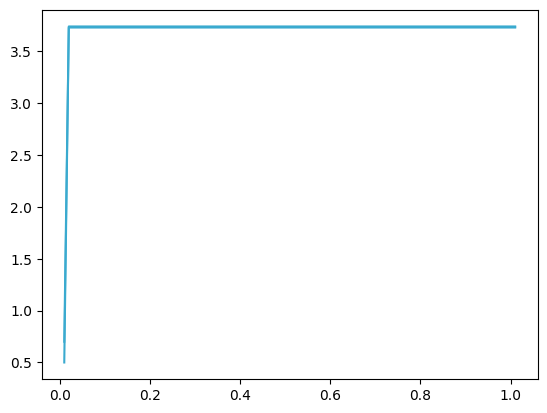

In [16]:
def count_time(e):
    return round(1.57 / (e - 0.25) ** (1 / 2), 2)

e = [0.15, 0.2, 0.25]
alpha = 0.8
b = [0.5, 0.6, 0.7]
g = 1
eu = e[-1]
ed = e[0]
d = [b[0]]
u = [b[-1]]
#(Interval Arithmetic-1)
for i in np.arange(0.01, g + 0.01, 0.01):
    counter = 0
    D = d[counter] + f(d[counter], u[counter], eu)
    U = u[counter] + f(u[counter], d[counter], ed)
    down = d[counter] + (f(d[counter], u[counter], eu) + f(D, U, eu)) / 2
    up = u[counter] + (f(u[counter], d[counter], ed) + f(U, D, ed)) / 2
    d.append(round(down, 2))
    u.append(round(up, 2))
    counter += 1

x = [i for i in np.arange(0.01, g + 0.02, 0.01)]
plt.plot(x, d, color='#3AAACF')
plt.plot(x, u, color='#3AAACF')
plt.show()

In [17]:
#(Interval Arithmetic-2)
e = [0.15, 0.2, 0.25]
alpha = 0.8
b = [0.5, 0.6, 0.7]
g = 1
eu = e[-1]
ed = e[0]
d = [b[0]]
u = [b[-1]]

for i in np.arange(0.01, g, 0.01):
    counter = 0
    D = d[counter] + f(u[counter], d[counter], ed)
    U = u[counter] + f(d[counter], u[counter], eu)
    down = d[counter] + (f(u[counter], d[counter], ed) + f(U, D, ed)) / 2
    up = u[counter] + (f(d[counter], u[counter], ed) + f(D, U, eu)) / 2
    d.append(down)
    u.append(up)
    counter += 1

##Fuzzy Differentiation

###Fuzzifying Function at Crisp Point

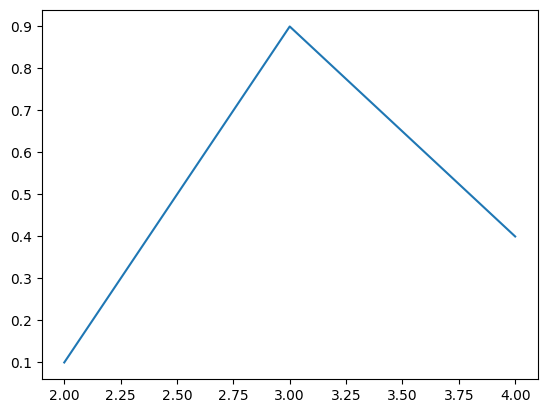

In [18]:
from sympy import diff, symbols, cos, sin, lambdify


def diff_at_point(point, number, ver_num):
    n = len(number)
    numb = []
    for i in range(n):
        number[i] = diff(number[i], x)
        temp = lambdify(x, number[i])
        numb.append(temp(point))
    return sort_by_value(numb, ver_num)


point = 2
x = symbols('x')
number = [2 * x, x ** 2 + 1, 3 * x - 1]
ver_num = [0.1, 0.4, 0.9]
x, y = diff_at_point(point, number, ver_num)
plt.plot(x, y)

###Crisp Function at Fuzzy Point

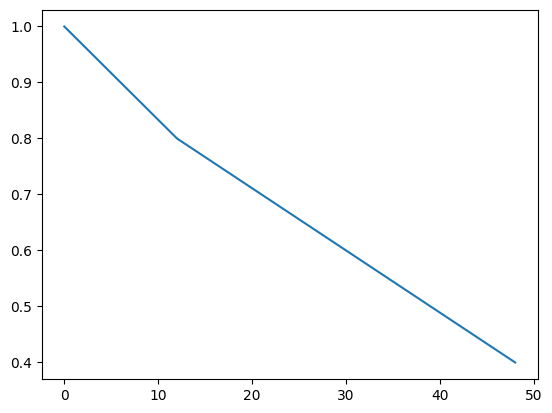

In [19]:
from sympy import diff, symbols, cos, sin, lambdify


def diff_point(number, ver, elem_point):
    diffs = diff(number)
    n = len(elem_point)
    numb = []
    dct = {}
    for i in elem_point:
        temp = lambdify(x, diffs)
        numb.append(temp(i))

    for i in range(n):
        if numb[i] not in dct:
            dct.update({numb[i]: []})
        dct[numb[i]].append(ver[i])
    
    return get_max(dct)

x = symbols('x')
number = 4 * x ** 3
ver = [0.2, 0.6, 1.0, 0.8, 0.4]
elem_point = [-2, -1, 0, 1, 2]

x, y = diff_point(number, ver, elem_point)
plt.plot(x, y)

##Fuzzy Integration

###Fuzzifying Function Over Crisp Limits

In [20]:
import sympy as sy


def integrand(x):
    f = [2 * x ** 2, 2 * x - 1, x ** (-2), x ** 3 - 4 * x ** 2 + 1]
    return f


def int_over_crisp(ver, f):
    x = sy.Symbol("x")
    n = len(ver)
    I = []
    border = [i for i in range(1, n+1)]
    for i in range(n):
        cont = 0
        I.append(sy.integrate(integrand(x)[i], (x, border[0], border[-1])))
    return I, ver

x = sy.Symbol("x")
ver = [0.7, 0.2, 0.9, 1.0]
x, y = int_over_crisp(ver, f)
x, y

([42, 12, 3/4, -69/4], [0.7, 0.2, 0.9, 1.0])

###Crisp Function Over Fuzzy Limits

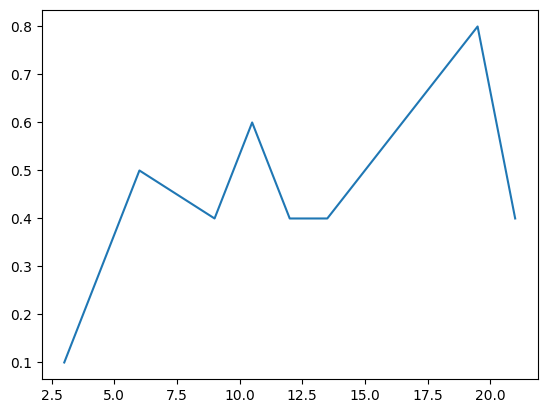

In [21]:
def int_over_fuzz_lim(down_limit, ver_down_limit, up_limit, ver_up_limit):
    x = sy.Symbol("x")
    I = []
    n = len(down_limit)
    m = len(up_limit)
    new_ver = []
    dct = {}
    for i in range(n):
        for j in range(m):
            I.append(round(sy.integrate(integrand(x), 
                                        (x, down_limit[i], up_limit[j])), 2))
            new_ver.append(min(ver_down_limit[i], ver_up_limit[j]))
    for i in range(len(I)):
        if I[i] not in dct:
            dct.update({I[i]: []})
        dct[I[i]].append(new_ver[i])
    return get_max(dct)


def integrand(x):
    return 3


down_limit = [2, 4, 5]
ver_down_limit = [0.8, 0.4, 0.6]
up_limit = [6, 7, 8.5, 9]
ver_up_limit = [0.1, 0.5, 0.9, 0.4]

x, y = int_over_fuzz_lim(down_limit, ver_down_limit, up_limit, ver_up_limit)
plt.plot(x, y)

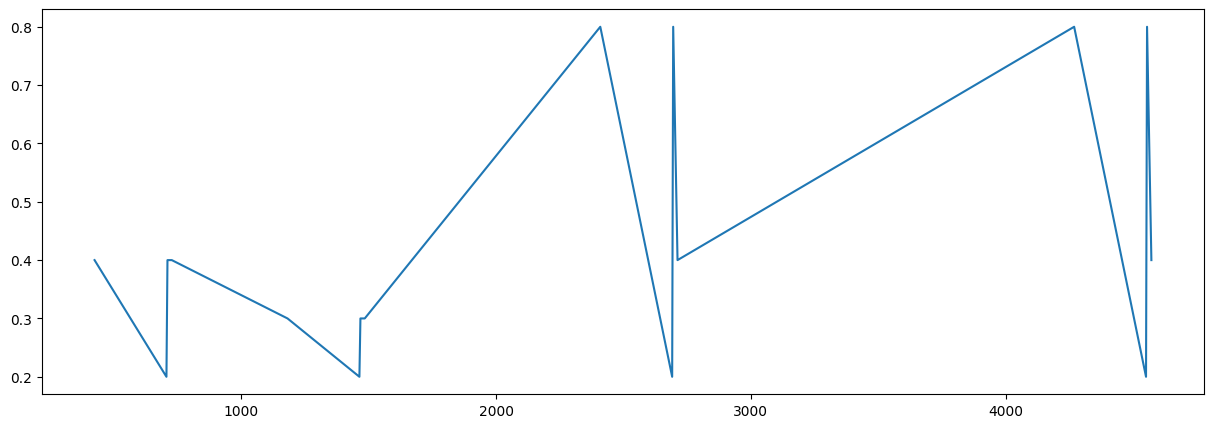

In [22]:
#Example
def integrand(x):
    return 4 * x ** 3 + 3 * x ** 2 - 5

down_limit = [-2, 1, 2, 4]
ver_down_limit = [0.2, 0.4, 1.0, 0.8]
up_limit = [5, 6, 7, 8]
ver_up_limit = [0.4, 0.3, 0.8, 0.8]
x, y = int_over_fuzz_lim(down_limit, ver_down_limit, up_limit, ver_up_limit)
plt.figure(figsize=(15, 5))
plt.plot(x, y)

#Class Fuzzy Triangle

In [25]:
from sympy import diff, symbols, cos, sin, lambdify
import sys
sys.setrecursionlimit(10000)

class Triangle:


    def __init__(self, number):
        self.number = number


    def partition(self, array, left, right, pivot, array2):
        while left < right:
            while left < right:
                if array[pivot] > array[right]:
                    break
                right = right - 1
            while left < right:
                if array[pivot] < array[left]:
                    break
                left = left + 1
            if left < right:
                array[left], array[right] = array[right], array[left]
                array2[left], array2[right] = array2[right], array2[left]
        if array[left] > array[pivot]:
            array[left], array[pivot] = array[pivot], array[left]
            array2[left], array2[pivot] = array2[pivot], array2[left]
            return left
        else:
            array[left + 1], array[pivot] = array[pivot], array[left + 1]
            array2[left + 1], array2[pivot] = array2[pivot], array2[left + 1]
            return left + 1


    def QuickSort(self, array, start, stop, array2):
        if stop <= start:
            return
        else:
            part = self.partition(array, start, stop-1, stop, array2)
            self.QuickSort(array, start, part-1, array2)
            self.QuickSort(array, part+1, stop, array2)



    def get_max(self, dct):
        self.x, self.y = [], []
        for i in self.dct:
            self.x.append(i)
            self.y.append(max(self.dct.get(i)))
        self.QuickSort(self.x, 0, len(self.x) - 1, self.y)
        return Triangle([self.x, self.y])


    def __add__(self, other):
        self.dct = {}
        diap_a, diap_b = len(self.number[0]), len(other.number[0])
        for i in range(diap_a):
            for j in range(diap_b):
                operation = self.number[0][i] + other.number[0][j]
                if operation not in self.dct:
                    self.dct.update({operation: []})
                mn = min(self.number[1][i], other.number[1][j])
                self.dct[operation].append(mn)
        return self.get_max(self.dct)
    
    
    def __sub__(self, other):
        self.dct = {}
        diap_a, diap_b = len(self.number[0]), len(other.number[0])
        for i in range(diap_a):
            for j in range(diap_b):
                operation = self.number[0][i] - other.number[0][j]
                if operation not in self.dct:
                    self.dct.update({operation: []})
                mn = min(self.number[1][i], other.number[1][j])
                self.dct[operation].append(mn)
        return self.get_max(self.dct)
    

    def __mul__(self, other):
        self.dct = {}
        diap_a, diap_b = len(self.number[0]), len(other.number[0])
        for i in range(diap_a):
            for j in range(diap_b):
                operation = round(self.number[0][i] * other.number[0][j], 4)
                if operation not in self.dct:
                    self.dct.update({operation: []})
                mn = min(self.number[1][i], other.number[1][j])
                self.dct[operation].append(mn)
        return self.get_max(self.dct)

    
    def __truediv__(self, other):
        self.dct = {}
        diap_a, diap_b = len(self.number[0]), len(other.number[0])
        for i in range(diap_a):
            for j in range(diap_b):
                operation = round(self.number[0][i] / other.number[0][j], 4)
                if operation not in self.dct:
                    self.dct.update({operation: []})
                mn = min(self.number[1][i], other.number[1][j])
                self.dct[operation].append(mn)
        return self.get_max(self.dct)
    

    def min(self, other):
        self.dct = {}
        diap_a, diap_b = len(self.number[0]), len(other.number[0])
        for i in range(diap_a):
            for j in range(diap_b):
                operation = max(self.number[0][i], other.number[0][j])
                if operation not in self.dct:
                    self.dct.update({operation: []})
                mn = min(self.number[1][i], other.number[1][j])
                self.dct[operation].append(mn)
        return self.get_max(self.dct)
    
    
    def __pow__(self, k: float): #формула с Леонкова стр. 94
        numb = self.number[0]
        ver_numb = self.number[1]
        for i in range(len(ver_numb)):
            ver_numb[i] = round(ver_numb[i] ** k, 4)
        return Triangle([numb, ver_numb])
    

    def max(self, other):
        self.dct = {}
        diap_a, diap_b = len(self.number[0]), len(other.number[0])
        for i in range(diap_a):
            for j in range(diap_b):
                operation = min(self.number[0][i], other.number[0][j])
                if operation not in self.dct:
                    self.dct.update({operation: []})
                mn = min(self.number[1][i], other.number[1][j])
                self.dct[operation].append(mn)
        return self.get_max(self.dct)
    

    def diff_at_point(self, point):
        n = len(self.number[0])
        functions = self.number[0]
        self.y = self.number[1]
        self.point = point
        self.x = []
        for i in range(n):
            functions[i] = diff(functions[i], x)
            f = lambdify(x, functions[i])
            self.x.append(f(self.point))
        self.QuickSort(self.x, 0, len(self.x)-1, self.y)
        return Triangle([self.x, self.y])


    def diff_point(self, function):
        diffs = diff(function)
        elem_point = self.number[0]
        ver = self.number[1]
        n = len(elem_point)
        numb = []
        self.dct = {}
        for i in elem_point:
            temp = lambdify(x, diffs)
            numb.append(temp(i))
        for i in range(n):
            if numb[i] not in self.dct:
                self.dct.update({numb[i]: []})
            self.dct[numb[i]].append(ver[i])
        return self.get_max(self.dct)


    def int_over_crisp(self):
        functions = self.number[0]
        n = len(self.number[1])
        self.y = self.number[1]
        self.x = []
        border = [i for i in range(1, n+1)]
        for i in range(n):
            self.x.append(sy.integrate(functions[i], \
                                       (x, border[0], border[-1])))
        self.QuickSort(self.x, 0, len(self.x)-1, self.y)
        return Triangle([self.x, self.y])
    

    def mean(self): #среднее нечеткого числа
        num = self.number[0]
        ver_num = self.number[1]
        numerator, denominator = 0, 0
        for i in range(len(num)):
            numerator = numerator + num[i] * ver_num[i]
            denominator = denominator + ver_num[i]
        e = round(numerator / denominator, 2)
        return e

    

    def int_over_fuzz_lim(self, other, fucntion):
        I = []
        x = sy.Symbol("x")
        down_limit = self.number[0]
        ver_down_limit = self.number[1]
        up_limit = other.number[0]
        ver_up_limit = other.number[1]
        n = len(down_limit)
        m = len(up_limit)
        new_ver = []
        self.dct = {}
        for i in range(n):
            for j in range(m):
                I.append(round(sy.integrate(fucntion, \
                                            (x, down_limit[i], up_limit[j])), \
                               2))
                new_ver.append(min(ver_down_limit[i], ver_up_limit[j]))
        for i in range(len(I)):
            if I[i] not in self.dct:
                self.dct.update({I[i]: []})
            self.dct[I[i]].append(new_ver[i])
        return self.get_max(self.dct)



In [145]:
a = Triangle([[3, 5, 6], [0.2, 0.6, 0.8]])
b = Triangle([[1, 2, 3], [0.1, 0.5, 0.6]])
print((a + b).number, '- сложение')
print((a - b).number, '- вычитание')
print((a * b).number, '- умножение')
print((a / b).number, '- деление')
print((a ** 2).number, '- возведение в степень')
print(Triangle.max(a, b).number, '- максимум')
print(Triangle.min(a, b).number, '- минимум')

[[4, 5, 6, 7, 8, 9], [0.1, 0.2, 0.2, 0.5, 0.6, 0.6]] - сложение
[[0, 1, 2, 3, 4, 5], [0.2, 0.2, 0.6, 0.6, 0.5, 0.1]] - вычитание
[[3, 5, 6, 9, 10, 12, 15, 18], [0.1, 0.1, 0.2, 0.2, 0.5, 0.5, 0.6, 0.6]] - умножение
[[1.0, 1.5, 1.6667, 2.0, 2.5, 3.0, 5.0, 6.0], [0.2, 0.2, 0.6, 0.6, 0.5, 0.5, 0.1, 0.1]] - деление
[[3, 5, 6], [0.04, 0.36, 0.64]] - возведение в степень
[[1, 2, 3], [0.1, 0.5, 0.6]] - максимум
[[3, 5, 6], [0.04, 0.36, 0.6]] - минимум


In [146]:
x = symbols('x')
functions = [2 * x, x ** 2 + 1, 3 * x - 1]
point = 2
ver_num = [0.1, 0.4, 0.9]

number = Triangle([functions, ver_num])
Triangle.diff_at_point(number, point).number

[[2, 3, 4], [0.1, 0.9, 0.4]]

In [28]:
x = symbols('x')
function = 4 * x ** 3

number = Triangle([[-2, -1, 0, 1, 2], [0.2, 0.6, 1.0, 0.8, 0.4]])
Triangle.diff_point(number, function).number

[[0, 12, 48], [1.0, 0.8, 0.4]]

In [147]:
x = sy.Symbol("x")
functions = [2 * x ** 2, 2 * x - 1, x ** (-2), x ** 3 - 4 * x ** 2 + 1]
ver_num = [0.7, 0.2, 0.9, 1.0]

number = Triangle([functions, ver_num])
Triangle.int_over_crisp(number).number

[[-69/4, 3/4, 12, 42], [1.0, 0.9, 0.2, 0.7]]

In [148]:
down = Triangle([[2, 4, 5], [0.8, 0.4, 0.6]])
up = Triangle([[6, 7, 8.5, 9], [0.1, 0.5, 0.9, 0.4]])
function = 3
Triangle.int_over_fuzz_lim(down, up, function).number

[[3, 6, 9, 10.50, 12, 13.50, 15, 19.50, 21],
 [0.1, 0.5, 0.4, 0.6, 0.4, 0.4, 0.5, 0.8, 0.4]]

#Linear regression

Функции сортировки

In [149]:
def partition(array, left, right, pivot, array2):
    while left < right:
        while left < right:
            if array[pivot] > array[right]:
                break
            right = right - 1
        while left < right:
            if array[pivot] < array[left]:
                break
            left = left + 1
        if left < right:
            array[left], array[right] = array[right], array[left]
            array2[left], array2[right] = array2[right], array2[left]
    if array[left] > array[pivot]:
        array[left], array[pivot] = array[pivot], array[left]
        array2[left], array2[pivot] = array2[pivot], array2[left]
        return left
    else:
        array[left + 1], array[pivot] = array[pivot], array[left + 1]
        array2[left + 1], array2[pivot] = array2[pivot], array2[left + 1]
        return left + 1


def QuickSort(array, start, stop, array2):
    if stop <= start:
        return
    else:
        part = partition(array, start, stop-1, stop, array2)
        QuickSort(array, start, part-1, array2)
        QuickSort(array, part+1, stop, array2)

Заполнение x и y

In [134]:
import numpy as np
np.random.seed(2025)
m = 10
n = 3
x = [sorted(round(np.random.uniform(5, 10), 2) for i in range (n)) for i in range (m)]
ver_x = [[round(np.random.uniform(0, 1), 2) for i in range (n)] for i in range (m)]
y = [sorted(round(np.random.uniform(5, 10), 2) for i in range (n)) for i in range (m)]
ver_y = [[round(np.random.uniform(0, 1), 2) for i in range (n)] for i in range (m)]
len(x)
X, Y = [], []
for i in range(len(x)):
    X.append([x[i], ver_x[i]])
    Y.append([y[i], ver_y[i]])
len(X)

10

Для числителя и знаменателя отбираем n элементов с максимальной вероятностью, чтобы коэфициенты получились с более правдоподобными значениями, приближенными к изначальным числам

In [ ]:
def take_n_numbers(numerator, denominator, n):
    QuickSort(numerator[1], 0, len(numerator[0]) - 1 , numerator[0])
    QuickSort(denominator[1], 0, len(denominator[0]) - 1, denominator[0])
    temp_numerator_x = []
    temp_numerator_ver = []
    temp_denominator_x = []
    temp_denominator_ver = []
    for i in range(1, n + 1):
        temp_numerator_x.append(numerator[0][-i])
        temp_numerator_ver.append(numerator[1][-i])
        temp_denominator_x.append(denominator[0][-i])
        temp_denominator_ver.append(denominator[1][-i])
    QuickSort(temp_numerator_x, 0, len(temp_numerator_x) - 1 , temp_numerator_ver)
    QuickSort(temp_denominator_x, 0, len(temp_denominator_x) - 1, temp_denominator_ver)
    numenator = Triangle([temp_numerator_x, temp_numerator_ver])
    denominator = Triangle([temp_denominator_x, temp_denominator_ver])
    return numenator, denominator

Функция получения коэфициентов регрессии методом МНК

In [153]:
def coef_for_regression(X, Y):
    E_x, E_y = [], []
    m = len(X)
    n = len(X[0][0])
    for i in range(n):
        E_x.append(Triangle(X[i]).mean())
        E_y.append(Triangle(Y[i]).mean())
    E_x = Triangle([[round(np.mean(E_x), 2)], [1]])
    E_y = Triangle([[round(np.mean(E_y), 2)], [1]])
    numerator = Triangle([[0], [1]])
    denominator = Triangle([[0], [1]])
    for i in range(m):
        numerator = numerator + (Triangle(X[i]) - E_x) * (Triangle(Y[i]) - E_y)
        denominator = denominator + (Triangle(X[i]) - E_x) ** 2
        numerator, denominator = \
            take_n_numbers(numerator.number, denominator.number, n)
    a = numerator / denominator
    b = E_y - a * E_x
    QuickSort(a.number[0], 0, len(a.number[0]) - 1 , a.number[1])
    QuickSort(b.number[0], 0, len(b.number[0]) - 1, b.number[1])
    return a.number, b.number
    

a, b = coef_for_regression(X, Y)
print(f'Нечеткие коэффициенты линейной регрессии: \n а = {a}, \n b = {b}')

Нечеткие коэффициенты линейной регрессии: 
 а = [[-1.646, -1.6329, -1.5855, -1.3745, -1.3635, -1.324, -1.2989, -1.2885, -1.2512], [0.4225, 0.4225, 0.4225, 0.4225, 0.4225, 0.4225, 0.4225, 0.4225, 0.4225]], 
 b = [[18.3122, 18.6124, 18.6961, 18.898200000000003, 19.2162, 19.3047, 21.0033, 21.3848, 21.490299999999998], [0.4225, 0.4225, 0.4225, 0.4225, 0.4225, 0.4225, 0.4225, 0.4225, 0.4225]]


Отбор граничных значений

In [136]:
middle_coef_a = a[0][a[1].index(max(a[1]))]
down_coef_a = min(a[0])
up_coef_a = max(a[0])
down_coef_b = min(b[0])
up_coef_b = max(b[0])
middle_coef_b = b[0][b[1].index(max(b[1]))]
down_y = []
up_y = []
middle_y = []
down_x = []
up_x = []
middle_x = []
true_y_down = []
true_y_up = []
true_y_middle = []
for i in range(m):
    true_y_down.append(Y[i][0][0])
    true_y_up.append(Y[i][0][-1])
    true_y_middle.append(Y[i][0][Y[i][1].index(max(Y[i][1]))])
    temp_down_x = x[i][0]
    temp_up_x = x[i][-1]
    temp_middle_x = x[i][ver_x[i].index(max(ver_x[i]))]
    down_x.append(temp_down_x)
    up_x.append(temp_up_x)
    middle_x.append(temp_middle_x)
    down_y.append(down_coef_a * temp_down_x + down_coef_b)
    up_y.append(up_coef_a * temp_up_x + up_coef_b)
    middle_y.append(middle_coef_a * temp_middle_x + middle_coef_b)



Построение регрессии

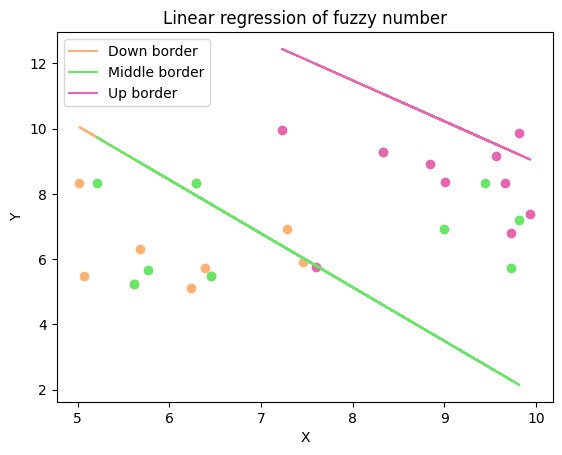

In [154]:
plt.scatter(down_x, true_y_down, color='#FFB273')
plt.plot(down_x, down_y, color='#FFB273', label='Down border')
plt.scatter(middle_x, true_y_middle, color='#67E667')
plt.plot(middle_x, middle_y, color='#67E667', label='Middle border')
plt.scatter(up_x, true_y_up, color='#E667AF')
plt.plot(up_x, up_y, color='#E667AF', label='Up border')
plt.title('Linear regression of fuzzy number')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()